<a href="https://colab.research.google.com/github/oskrtrom/PrediccionSismos/blob/main/CustomerDataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div class="markdown-google-sans">
  <h1>Te damos la bienvenida a Colab</h1>
</div>

<!-- TODO(b/319266067) remove temporary advert after a few weeks. -->
<div class="markdown-google-sans">
  <h2>&#40;Nuevo&#41; Prueba la API de Gemini</h2>
  <ul>
  <li><a href="https://makersuite.google.com/app/apikey">Generate a Gemini API key</a></li>
  <li><a href="https://colab.research.google.com/github/googlecolab/colabtools/blob/main/notebooks/Talk_to_Gemini_with_Google%27s_Speech_to_Text_API.ipynb?utm_medium=link&utm_campaign=gemini">Talk to Gemini with the Speech-to-Text API</a></li>
  <li><a href="https://colab.research.google.com/github/google/generative-ai-docs/blob/main/site/en/tutorials/python_quickstart.ipynb?utm_medium=link&utm_campaign=gemini">Gemini API: Quickstart with Python</a></li>
  <li><a href="https://colab.research.google.com/notebooks/snippets/gemini.ipynb?utm_medium=link&utm_campaign=gemini">Gemini API code sample</a></li>
  <li><a href="https://colab.research.google.com/github/googlecolab/colabtools/blob/main/notebooks/Learning_with_Gemini_and_ChatGPT.ipynb?utm_medium=link&utm_campaign=gemini">Compare Gemini with ChatGPT</a></li>  
  <li><a href="https://colab.google/notebooks/?utm_medium=link&utm_campaign=gemini">More notebooks</a></li>
  </ul>
</div>


In [6]:
import pandas as pd
import numpy as np

# Definir la función para generar datos sintéticos de segmentación de clientes
def generate_customer_data(num_samples=1000):
    np.random.seed(0)

    # Generar datos para características de comportamiento de compra
    behavior_data = np.random.rand(num_samples, 4)  # Supongamos que tenemos 4 características de comportamiento

    # Generar datos para características demográficas
    age = np.random.randint(18, 81, size=num_samples)  # Edades entre 18 y 80 años
    income = np.random.randint(20000, 150000, size=num_samples)  # Ingresos anuales entre $20,000 y $150,000

    # Generar datos para la variable objetivo (por ejemplo, segmentos de clientes)
    segment_labels = np.random.choice(['Segmento A', 'Segmento B', 'Segmento C'], size=num_samples)

    # Crear un DataFrame para almacenar los datos generados
    df = pd.DataFrame(behavior_data, columns=['Comportamiento1', 'Comportamiento2', 'Comportamiento3', 'Comportamiento4'])
    df['Edad'] = age
    df['Ingreso'] = income
    df['Segmento'] = segment_labels

    return df

# Generar el conjunto de datos sintético
customer_data = generate_customer_data(num_samples=1000)

# Guardar el conjunto de datos en un archivo CSV
customer_data.to_csv('customer_data.csv', index=False)

# Mostrar las primeras filas del conjunto de datos generado
print(customer_data.head())


   Comportamiento1  Comportamiento2  Comportamiento3  Comportamiento4  Edad  \
0         0.548814         0.715189         0.602763         0.544883    70   
1         0.423655         0.645894         0.437587         0.891773    79   
2         0.963663         0.383442         0.791725         0.528895    75   
3         0.568045         0.925597         0.071036         0.087129    79   
4         0.020218         0.832620         0.778157         0.870012    23   

   Ingreso    Segmento  
0    42385  Segmento B  
1    93669  Segmento C  
2   124919  Segmento C  
3   149765  Segmento C  
4   130196  Segmento A  


In [2]:
# prompt: convertir el customer_data.csv a xlsx

customer_data.to_excel('customer_data.xlsx', index=False)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


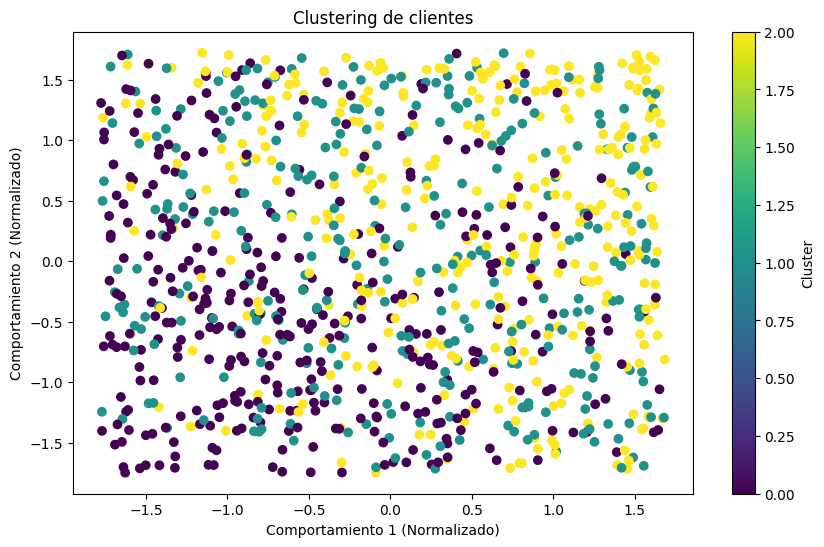

In [3]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Cargar el conjunto de datos sintético de clientes
customer_data = pd.read_csv('customer_data.csv')

# Seleccionar solo las características relevantes para el clustering (comportamiento y demográficas)
X = customer_data[['Comportamiento1', 'Comportamiento2', 'Comportamiento3', 'Comportamiento4', 'Edad', 'Ingreso']]

# Normalizar los datos (es importante para K-Means)
X_normalized = (X - X.mean()) / X.std()

# Definir el número de clusters (segmentos de clientes)
num_clusters = 3

# Inicializar y entrenar el modelo K-Means
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
clusters = kmeans.fit_predict(X_normalized)

# Agregar la información de clusters al DataFrame original
customer_data['Cluster'] = clusters

# Visualizar los clusters en el espacio de características reducido (2D)
plt.figure(figsize=(10, 6))
plt.scatter(X_normalized.iloc[:, 0], X_normalized.iloc[:, 1], c=clusters, cmap='viridis')
plt.title('Clustering de clientes')
plt.xlabel('Comportamiento 1 (Normalizado)')
plt.ylabel('Comportamiento 2 (Normalizado)')
plt.colorbar(label='Cluster')
plt.show()

# Analizar los clusters
cluster_counts = customer_data['Cluster'].value_counts()
print("Número de clientes en cada cluster:")
print(cluster_counts)


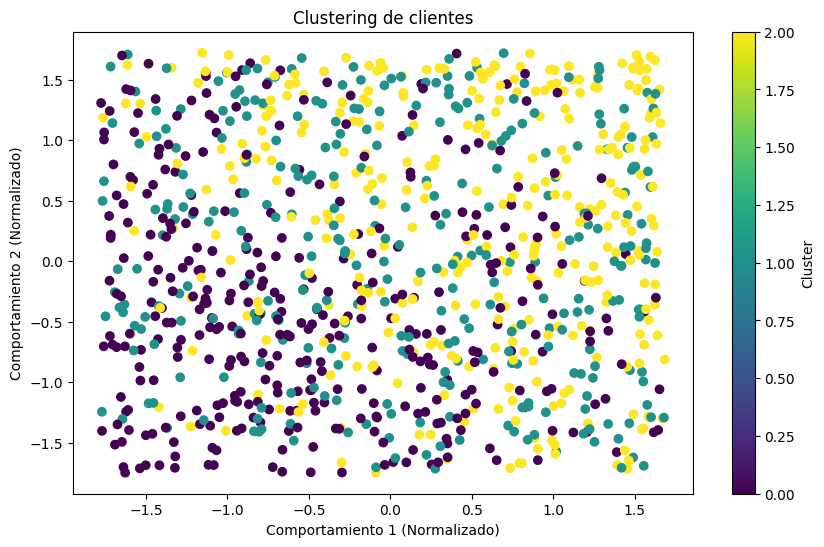

In [5]:
import matplotlib.pyplot as plt

# Visualizar los clusters en el espacio de características reducido (2D)
plt.figure(figsize=(10, 6))
plt.scatter(X_normalized.iloc[:, 0], X_normalized.iloc[:, 1], c=clusters, cmap='viridis')
plt.title('Clustering de clientes')
plt.xlabel('Comportamiento 1 (Normalizado)')
plt.ylabel('Comportamiento 2 (Normalizado)')
plt.colorbar(label='Cluster')
plt.show()


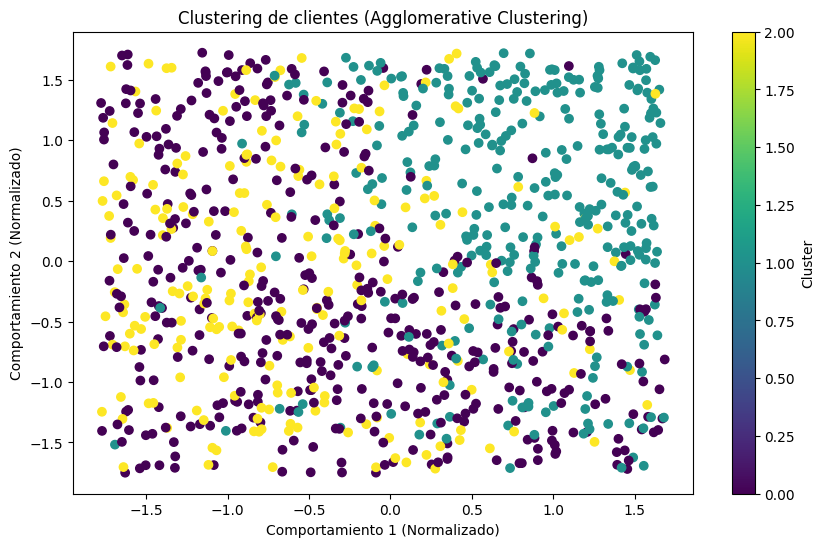

Número de clientes en cada cluster:
0    434
1    341
2    225
Name: count, dtype: int64


In [8]:
import pandas as pd
import numpy as np
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Cargar el conjunto de datos sintético de clientes
customer_data = pd.read_csv('customer_data.csv')

# Seleccionar las características relevantes para el clustering (comportamiento y demográficas)
X = customer_data[['Comportamiento1', 'Comportamiento2', 'Comportamiento3', 'Comportamiento4', 'Edad', 'Ingreso']]

# Normalizar los datos
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

# Definir el número de clusters (segmentos de clientes)
num_clusters = 3

# Inicializar y entrenar el modelo de Clustering Jerárquico Aglomerativo
clustering = AgglomerativeClustering(n_clusters=num_clusters)
clusters = clustering.fit_predict(X_normalized)

# Visualizar los clusters en el espacio de características reducido (2D)
plt.figure(figsize=(10, 6))
plt.scatter(X_normalized[:, 0], X_normalized[:, 1], c=clusters, cmap='viridis')
plt.title('Clustering de clientes (Agglomerative Clustering)')
plt.xlabel('Comportamiento 1 (Normalizado)')
plt.ylabel('Comportamiento 2 (Normalizado)')
plt.colorbar(label='Cluster')
plt.show()

# Analizar los clusters
cluster_counts = pd.Series(clusters).value_counts()
print("Número de clientes en cada cluster:")
print(cluster_counts)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


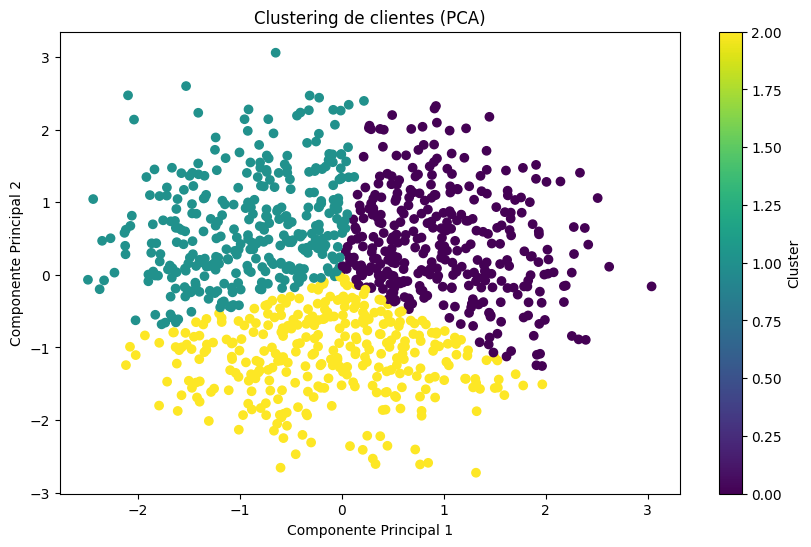

In [9]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Cargar el conjunto de datos sintético de clientes
customer_data = pd.read_csv('customer_data.csv')

# Seleccionar las características relevantes para el clustering (comportamiento y demográficas)
X = customer_data[['Comportamiento1', 'Comportamiento2', 'Comportamiento3', 'Comportamiento4', 'Edad', 'Ingreso']]

# Normalizar los datos (es importante para PCA)
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

# Aplicar PCA para reducir la dimensionalidad a 2 componentes principales
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_normalized)

# Definir el número de clusters (segmentos de clientes)
num_clusters = 3

# Inicializar y entrenar el modelo K-Means en los datos reducidos por PCA
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
clusters = kmeans.fit_predict(X_pca)

# Visualizar los clusters en el espacio bidimensional reducido por PCA
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis')
plt.title('Clustering de clientes (PCA)')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.colorbar(label='Cluster')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


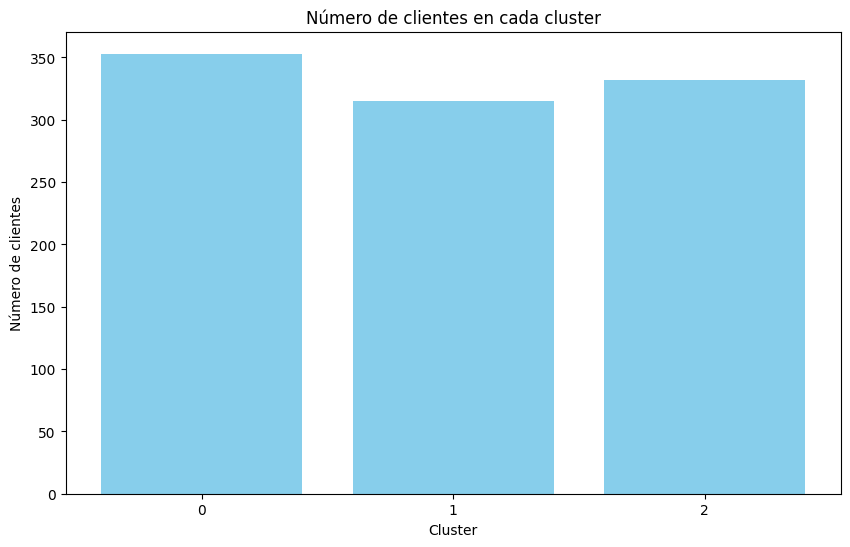

In [10]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Cargar el conjunto de datos sintético de clientes
customer_data = pd.read_csv('customer_data.csv')

# Seleccionar las características relevantes para el clustering (comportamiento y demográficas)
X = customer_data[['Comportamiento1', 'Comportamiento2', 'Comportamiento3', 'Comportamiento4', 'Edad', 'Ingreso']]

# Normalizar los datos (es importante para K-Means)
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

# Definir el número de clusters (segmentos de clientes)
num_clusters = 3

# Inicializar y entrenar el modelo K-Means
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
clusters = kmeans.fit_predict(X_normalized)

# Contar el número de clientes en cada cluster
cluster_counts = pd.Series(clusters).value_counts().sort_index()

# Crear un gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(cluster_counts.index, cluster_counts.values, color='skyblue')
plt.title('Número de clientes en cada cluster')
plt.xlabel('Cluster')
plt.ylabel('Número de clientes')
plt.xticks(cluster_counts.index)
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-11-9b73ec15b4a1>:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Cluster', y=feature, data=customer_data, palette='viridis')


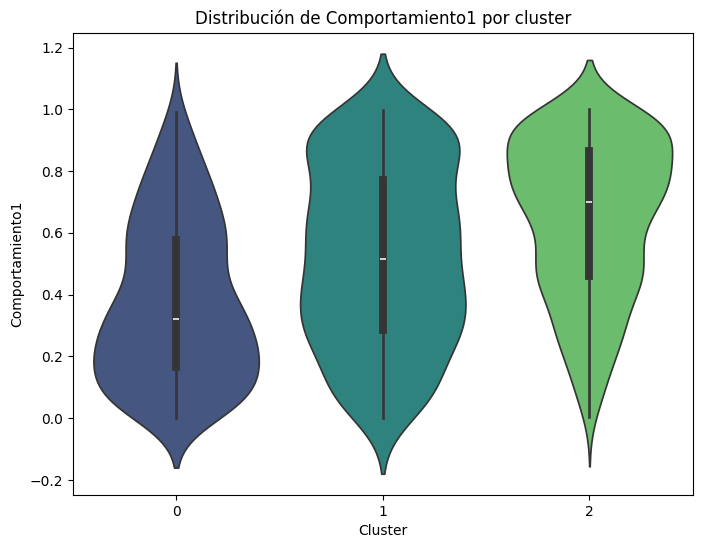

<ipython-input-11-9b73ec15b4a1>:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Cluster', y=feature, data=customer_data, palette='viridis')


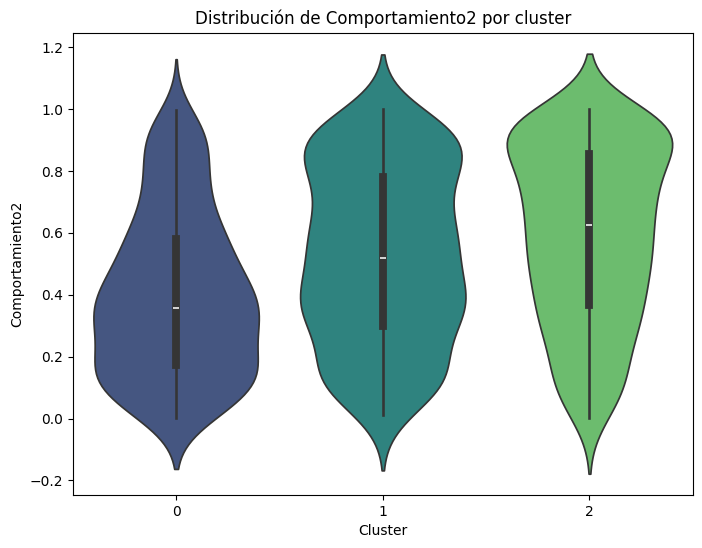

<ipython-input-11-9b73ec15b4a1>:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Cluster', y=feature, data=customer_data, palette='viridis')


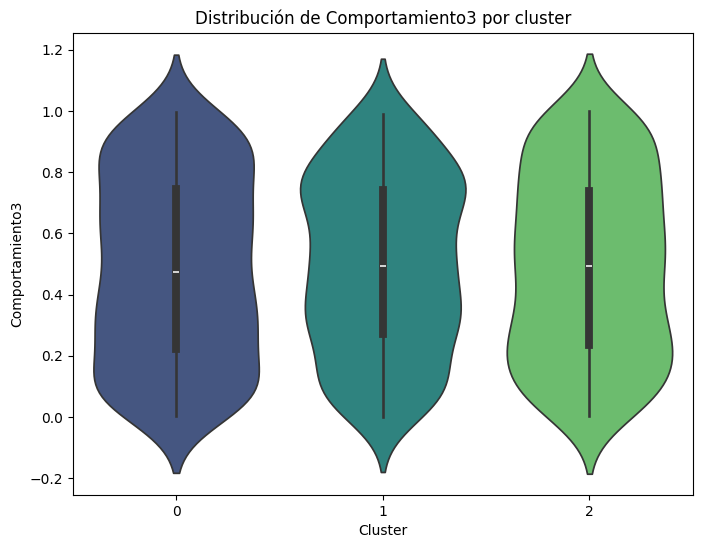

<ipython-input-11-9b73ec15b4a1>:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Cluster', y=feature, data=customer_data, palette='viridis')


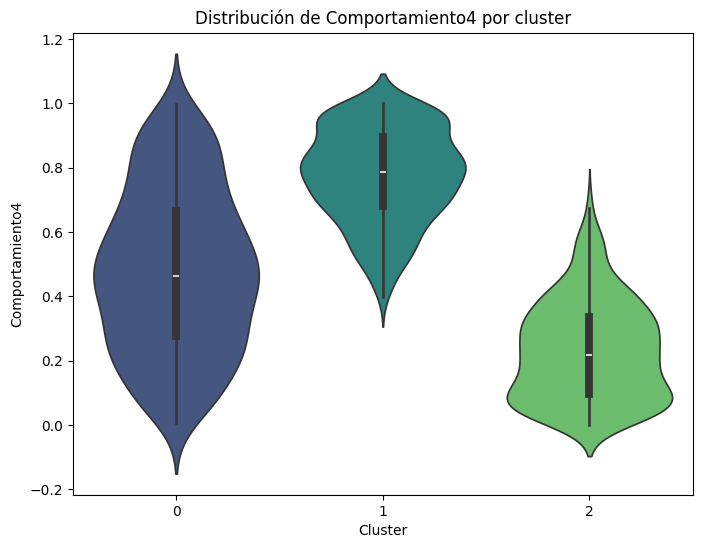

<ipython-input-11-9b73ec15b4a1>:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Cluster', y=feature, data=customer_data, palette='viridis')


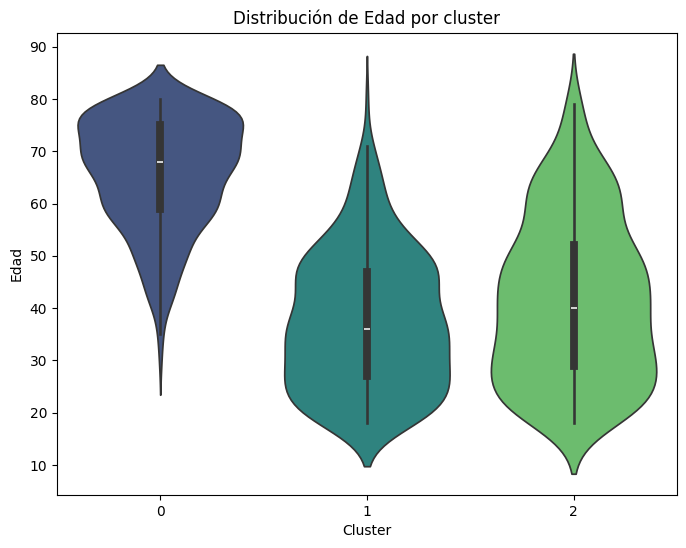

<ipython-input-11-9b73ec15b4a1>:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Cluster', y=feature, data=customer_data, palette='viridis')


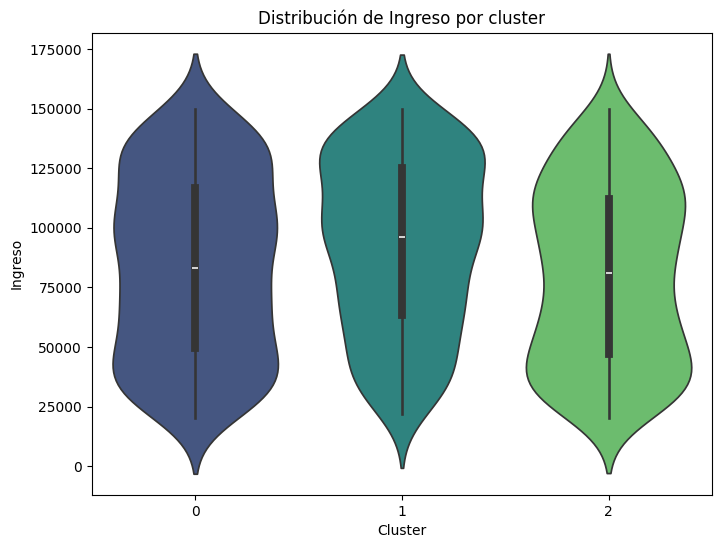

In [11]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar el conjunto de datos sintético de clientes
customer_data = pd.read_csv('customer_data.csv')

# Seleccionar las características relevantes para el clustering (comportamiento y demográficas)
X = customer_data[['Comportamiento1', 'Comportamiento2', 'Comportamiento3', 'Comportamiento4', 'Edad', 'Ingreso']]

# Normalizar los datos (es importante para K-Means)
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

# Definir el número de clusters (segmentos de clientes)
num_clusters = 3

# Inicializar y entrenar el modelo K-Means
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
clusters = kmeans.fit_predict(X_normalized)

# Agregar la información de clusters al DataFrame original
customer_data['Cluster'] = clusters

# Visualizar las características por cluster utilizando gráficos de violín
features = ['Comportamiento1', 'Comportamiento2', 'Comportamiento3', 'Comportamiento4', 'Edad', 'Ingreso']
for feature in features:
    plt.figure(figsize=(8, 6))
    sns.violinplot(x='Cluster', y=feature, data=customer_data, palette='viridis')
    plt.title(f'Distribución de {feature} por cluster')
    plt.xlabel('Cluster')
    plt.ylabel(feature)
    plt.show()


Si ya conoces Colab, mira este video para aprender sobre las tablas interactivas, la vista histórica de código ejecutado y la paleta de comandos.

<center>
  <a href="https://www.youtube.com/watch?v=rNgswRZ2C1Y" target="_blank">
  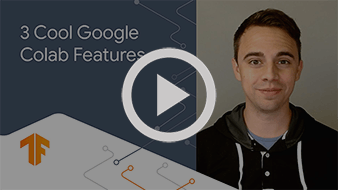
  </a>
</center>

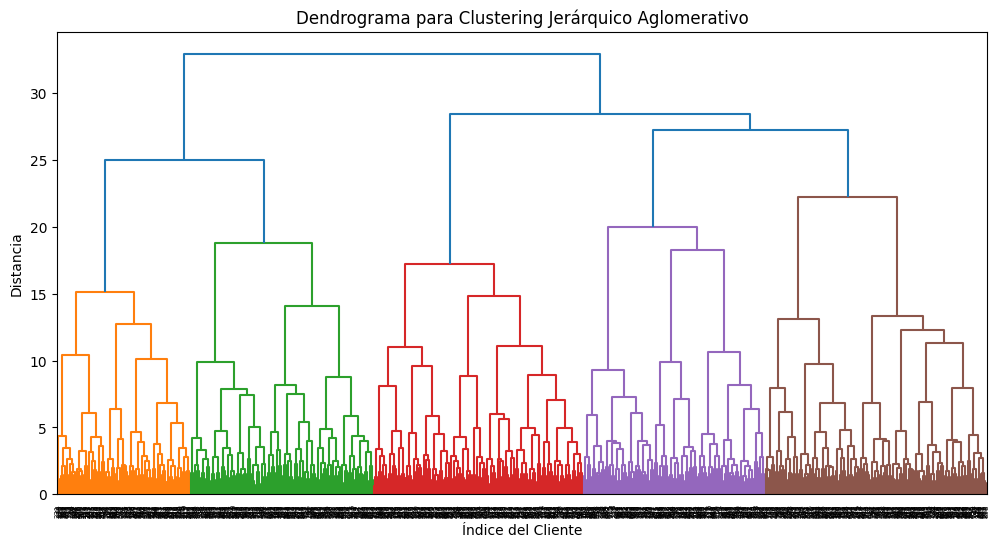

In [12]:
import pandas as pd
import numpy as np
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster import hierarchy
import matplotlib.pyplot as plt

# Cargar el conjunto de datos sintético de clientes
customer_data = pd.read_csv('customer_data.csv')

# Seleccionar las características relevantes para el clustering (comportamiento y demográficas)
X = customer_data[['Comportamiento1', 'Comportamiento2', 'Comportamiento3', 'Comportamiento4', 'Edad', 'Ingreso']]

# Normalizar los datos (es importante para el clustering jerárquico)
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

# Definir el número de clusters (segmentos de clientes)
num_clusters = 3

# Inicializar y entrenar el modelo de clustering jerárquico aglomerativo
clustering = AgglomerativeClustering(n_clusters=num_clusters)
clusters = clustering.fit_predict(X_normalized)

# Calcular la matriz de enlace para el dendrograma
linkage_matrix = hierarchy.linkage(X_normalized, method='ward')

# Visualizar el dendrograma
plt.figure(figsize=(12, 6))
dendrogram = hierarchy.dendrogram(linkage_matrix)
plt.title('Dendrograma para Clustering Jerárquico Aglomerativo')
plt.xlabel('Índice del Cliente')
plt.ylabel('Distancia')
plt.show()


<div class="markdown-google-sans">
  <h2>¿Qué es Colab?</h2>
</div>

Colab, o "Colaboratory", te permite escribir y ejecutar código de Python en tu navegador, con
- Sin configuración requerida
- Acceso sin costo a GPU
- Facilidad para compartir

Seas <strong>estudiante</strong>, <strong>científico de datos</strong> o <strong>investigador de IA</strong>, Colab facilita tu trabajo. Mira <a href="https://www.youtube.com/watch?v=inN8seMm7UI">este video introductorio sobre Colab</a> para obtener más información, o bien comienza a usarlo más abajo.

<div class="markdown-google-sans">

## <strong>Introducción</strong>
</div>

El documento que estás leyendo no es una página web estática, sino un entorno interactivo denominado <strong>notebook de Colab</strong>, que permite escribir y ejecutar código.

Por ejemplo, esta es una <strong>celda de código</strong> con una secuencia de comandos Python corta que calcula un valor, lo almacena en una variable y devuelve el resultado:

In [ ]:
seconds_in_a_day = 24 * 60 * 60
seconds_in_a_day

86400

A fin de ejecutar el código en la celda anterior, haz clic en él para seleccionarlo y luego presiona el botón de reproducción ubicado a la izquierda del código o usa la combinación de teclas "Command/Ctrl + Intro". Para editar el código, solo haz clic en la celda y comienza a editar.

Las variables que defines en una celda pueden usarse en otras:

In [ ]:
seconds_in_a_week = 7 * seconds_in_a_day
seconds_in_a_week

604800

Los notebooks de Colab te permiten combinar <strong>código ejecutable</strong> y <strong>texto enriquecido</strong> en un único documento, junto con <strong>imágenes</strong>, <strong>HTML</strong>, <strong>LaTeX</strong> y mucho más. Los notebooks que crees en Colab se almacenan en tu cuenta de Google Drive. Puedes compartir fácilmente los notebooks de Colab con amigos o compañeros de trabajo para que realicen comentarios o los editen. Si quieres obtener más información, consulta la <a href="/notebooks/basic_features_overview.ipynb">Descripción general de Colab</a>. Para crear un nuevo notebook de Colab, ve al menú Archivo que aparece más arriba o usa este vínculo: <a href="http://colab.research.google.com#create=true">crear un nuevo notebook de Colab</a>.

Los notebooks de Colab son notebooks de Jupyter que aloja Colab. Para obtener más información sobre el proyecto Jupyter, visita <a href="https://www.jupyter.org">jupyter.org</a>.

<div class="markdown-google-sans">

## Ciencia de datos
</div>

Con Colab, puedes aprovechar por completo las bibliotecas más populares de Python para analizar y visualizar datos. La celda de código que se incluye a continuación usa <strong>NumPy</strong> para generar algunos datos aleatorios y <strong>matplotlib</strong> para visualizarlos. Para editar el código, haz clic en la celda y comienza a editar.

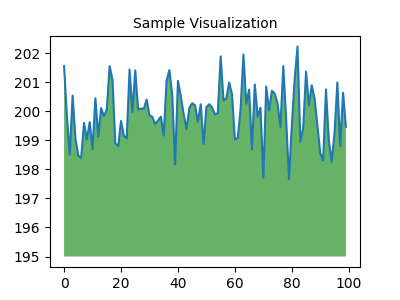

In [ ]:
import numpy as np
import IPython.display as display
from matplotlib import pyplot as plt
import io
import base64

ys = 200 + np.random.randn(100)
x = [x for x in range(len(ys))]

fig = plt.figure(figsize=(4, 3), facecolor='w')
plt.plot(x, ys, '-')
plt.fill_between(x, ys, 195, where=(ys > 195), facecolor='g', alpha=0.6)
plt.title("Sample Visualization", fontsize=10)

data = io.BytesIO()
plt.savefig(data)
image = F"data:image/png;base64,{base64.b64encode(data.getvalue()).decode()}"
alt = "Sample Visualization"
display.display(display.Markdown(F"""![{alt}]({image})"""))
plt.close(fig)

Puedes importar datos propios a notebooks de Colab desde tu cuenta de Google Drive &#40;incluso desde hojas de cálculos&#41;, GitHub y muchas otras fuentes. Para obtener más información acerca de la importación de datos y cómo puede usarse Colab para fines relacionados con la ciencia de datos, consulta los vínculos de <a href="#working-with-data">Cómo trabajar con datos</a>.

<div class="markdown-google-sans">

## Aprendizaje automático
</div>

Colab te permite importar un conjunto de datos de imágenes, entrenar un clasificador de imágenes en él y evaluar el modelo con solo <a href="https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/quickstart/beginner.ipynb">unas pocas líneas de código</a>. Los notebooks de Colab ejecutan código en los servidores alojados en la nube de Google, lo que significa que puedes aprovechar al máximo el hardware de Google, incluidas las <a href="#using-accelerated-hardware">GPU y TPU</a>, independientemente de la potencia de tu máquina. Lo único que necesitas es un navegador.

Entre los usos que se la da a Colab en la comunidad de aprendizaje automático, se encuentran los siguientes:
- Introducción a TensorFlow
- Desarrollo y entrenamiento de redes neuronales
- Experimentación con TPU
- Diseminación de investigación de IA
- Creación de instructivos

Para ver notebooks de Colab de ejemplo que muestran los usos del aprendizaje automático, consulta los <a href="#machine-learning-examples">ejemplos</a> que se incluyen a continuación.

<div class="markdown-google-sans">

## Más recursos

### Cómo trabajar con notebooks en Colab

</div>

- [Descripción general de Colaboratory](/notebooks/basic_features_overview.ipynb)
- [Guía para usar Markdown](/notebooks/markdown_guide.ipynb)
- [Cómo importar bibliotecas y luego instalar dependencias](/notebooks/snippets/importing_libraries.ipynb)
- [Cómo guardar y cargar notebooks en GitHub](https://colab.research.google.com/github/googlecolab/colabtools/blob/main/notebooks/colab-github-demo.ipynb)
- [Formularios interactivos](/notebooks/forms.ipynb)
- [Widgets interactivos](/notebooks/widgets.ipynb)

<div class="markdown-google-sans">

<a name="working-with-data"></a>
### Cómo trabajar con datos
</div>

- [Cómo cargar datos: Drive, Hojas de cálculo y Google Cloud Storage](/notebooks/io.ipynb)
- [Gráficos: visualización de datos](/notebooks/charts.ipynb)
- [Cómo comenzar a usar BigQuery](/notebooks/bigquery.ipynb)

<div class="markdown-google-sans">

### Curso intensivo de aprendizaje automático

<div>

Estos son algunos de los notebooks del curso de aprendizaje automático en línea de Google. Para obtener más información, consulta el <a href="https://developers.google.com/machine-learning/crash-course/">sitio web del curso completo</a>.
- [Introducción a Pandas DataFrame](https://colab.research.google.com/github/google/eng-edu/blob/main/ml/cc/exercises/pandas_dataframe_ultraquick_tutorial.ipynb)
- [Regresión lineal con tf.keras usando datos sintéticos](https://colab.research.google.com/github/google/eng-edu/blob/main/ml/cc/exercises/linear_regression_with_synthetic_data.ipynb)

<div class="markdown-google-sans">

<a name="using-accelerated-hardware"></a>
### Uso de aceleración de hardware
</div>

- [TensorFlow con GPU](/notebooks/gpu.ipynb)
- [TensorFlow con TPU](/notebooks/tpu.ipynb)

<div class="markdown-google-sans">

<a name="machine-learning-examples"></a>

### Ejemplos destacados

</div>

- <a href="https://colab.research.google.com/github/NVIDIA/NeMo/blob/stable/tutorials/VoiceSwapSample.ipynb">NeMo Voice Swap</a>: Utiliza el kit de herramientas de NeMo para IA conversacional de Nvidia si quieres cambiar una voz en un fragmento de audio por otra generada por computadora.

- <a href="https://tensorflow.org/hub/tutorials/tf2_image_retraining">Reentrenamiento de un clasificador de imágenes</a>: compila un modelo de Keras sobre un clasificador de imágenes previamente entrenado para distinguir flores.
- <a href="https://tensorflow.org/hub/tutorials/tf2_text_classification">Clasificación de texto</a>: clasifica opiniones sobre películas de IMDB como <em>positivas</em> o <em>negativas</em>.
- <a href="https://tensorflow.org/hub/tutorials/tf2_arbitrary_image_stylization">Transferencia de estilos</a>: usa el aprendizaje profundo para transferir el estilo de una imagen a otra.
- <a href="https://tensorflow.org/hub/tutorials/retrieval_with_tf_hub_universal_encoder_qa">Codificador universal de oraciones en varios idiomas para preguntas y respuestas</a>: usa un modelo de aprendizaje automático para responder preguntas del conjunto de datos SQuAD.
- <a href="https://tensorflow.org/hub/tutorials/tweening_conv3d">Interpolación de videos</a>: predice lo que sucedió en un video entre el primer y el último fotograma.


In [ ]:
import pandas as pd
import numpy as np
import random
from faker import Faker
import datetime

# Creamos un objeto Faker para generar datos falsos
fake = Faker()

# Definimos las categorías de productos
categorias = ['Electrónicos', 'Gadgets', 'Artículos para el hogar', 'Ropa']

# Creamos las tablas de clientes y productos
clientes = pd.DataFrame(columns=['ID', 'Nombre', 'Edad', 'Género', 'Ubicación'])
productos = pd.DataFrame(columns=['ID', 'Nombre', 'Categoría', 'Precio'])

# Generamos datos para clientes y productos
for i in range(100):
    clientes.loc[i] = [i, fake.name(), random.randint(18, 80), random.choice(['Masculino', 'Femenino']), fake.city()]
    productos.loc[i] = [i, fake.word().capitalize(), random.choice(categorias), round(random.uniform(10, 1000), 2)]

# Creamos la tabla de transacciones
transacciones = pd.DataFrame(columns=['ID', 'ID_Cliente', 'ID_Producto', 'Fecha', 'Cantidad', 'Método de Pago'])

# Generamos datos para transacciones
for i in range(1000):
    cliente_id = random.randint(0, 99)
    producto_id = random.randint(0, 99)
    fecha = fake.date_time_between(start_date='-1y', end_date='now')
    cantidad = random.randint(1, 5)
    metodo_pago = random.choice(['Tarjeta de crédito', 'Transferencia bancaria', 'PayPal'])
    transacciones.loc[i] = [i, cliente_id, producto_id, fecha, cantidad, metodo_pago]

# Guardamos los DataFrames en archivos CSV
clientes.to_csv('clientes.csv', index=False)
productos.to_csv('productos.csv', index=False)
transacciones.to_csv('transacciones.csv', index=False)


ModuleNotFoundError: No module named 'faker'

In [ ]:
# prompt: corrige el error e implementa y mejora el codigo
import pandas as pd
import numpy as np
import random
from faker import Faker
import datetime
# Creamos un objeto Faker para generar datos falsos
fake = Faker()

# Definimos las categorías de productos
categorias = ['Electrónicos', 'Gadgets', 'Artículos para el hogar', 'Ropa']

# Creamos las tablas de clientes y productos
clientes = pd.DataFrame(columns=['ID', 'Nombre', 'Edad', 'Género', 'Ubicación'])
productos = pd.DataFrame(columns=['ID', 'Nombre', 'Categoría', 'Precio'])

# Generamos datos para clientes y productos
for i in range(100):
    clientes.loc[i] = [i, fake.name(), random.randint(18, 80), random.choice(['Masculino', 'Femenino']), fake.city()]
    productos.loc[i] = [i, fake.word().capitalize(), random.choice(categorias), round(random.uniform(10, 1000), 2)]

# Creamos la tabla de transacciones
transacciones = pd.DataFrame(columns=['ID', 'ID_Cliente', 'ID_Producto', 'Fecha', 'Cantidad', 'Método de Pago'])

# Generamos datos para transacciones
for i in range(1000):
    cliente_id = random.randint(0, 99)
    producto_id = random.randint(0, 99)
    fecha = fake.date_time_between(start_date='-1y', end_date='now')
    cantidad = random.randint(1, 5)
    metodo_pago = random.choice(['Tarjeta de crédito', 'Transferencia bancaria', 'PayPal'])
    transacciones.loc[i] = [i, cliente_id, producto_id, fecha, cantidad, metodo_pago]

# Guardamos los DataFrames en archivos CSV
clientes.to_csv('clientes.csv', index=False)
productos.to_csv('productos.csv', index=False)
transacciones.to_csv('transacciones.csv', index=False)

# Imprimimos un mensaje de éxito
print('Datos generados y guardados correctamente.')


Datos generados y guardados correctamente.


In [ ]:
# prompt: implementa la correccion al codigo

fake = Faker()

# Definimos las categorías de productos
categorias = ['Electrónicos', 'Gadgets', 'Artículos para el hogar', 'Ropa']

# Creamos las tablas de clientes y productos
clientes = pd.DataFrame(columns=['ID', 'Nombre', 'Edad', 'Género', 'Ubicación'])
productos = pd.DataFrame(columns=['ID', 'Nombre', 'Categoría', 'Precio'])

# Generamos datos para clientes y productos
for i in range(100):
    clientes.loc[i] = [i, fake.name(), random.randint(18, 80), random.choice(['Masculino', 'Femenino']), fake.city()]
    productos.loc[i] = [i, fake.word().capitalize(), random.choice(categorias), round(random.uniform(10, 1000), 2)]

# Creamos la tabla de transacciones
transacciones = pd.DataFrame(columns=['ID', 'ID_Cliente', 'ID_Producto', 'Fecha', 'Cantidad', 'Método de Pago'])

# Generamos datos para transacciones
for i in range(1000):
    cliente_id = random.randint(0, 99)
    producto_id = random.randint(0, 99)
    fecha = fake.date_time_between(start_date='-1y', end_date='now')
    cantidad = random.randint(1, 5)
    metodo_pago = random.choice(['Tarjeta de crédito', 'Transferencia bancaria', 'PayPal'])
    transacciones.loc[i] = [i, cliente_id, producto_id, fecha, cantidad, metodo_pago]

# Guardamos los DataFrames en archivos CSV
clientes.to_csv('clientes.csv', index=False)
productos.to_csv('productos.csv', index=False)
transacciones.to_csv('transacciones.csv', index=False)

# Imprimimos un mensaje de éxito
print('Datos generados y guardados correctamente.')


Datos generados y guardados correctamente.


In [ ]:
# prompt: balancear  data.csv

!pip install imbalanced-learn
import pandas as pd
from imblearn.over_sampling import SMOTE

# Load the data
df = pd.read_csv('data.csv')

# Separate features and target
X = df.drop('target', axis=1)
y = df['target']

# Oversample the data using SMOTE
sm = SMOTE(random_state=42)
X_resampled, y_resampled = sm.fit_resample(X, y)

# Create a new balanced dataset
df_balanced = pd.concat([X_resampled, y_resampled], axis=1)

# Save the balanced dataset
df_balanced.to_csv('balanced_data.csv', index=False)


KeyError: "['target'] not found in axis"

In [ ]:
# Verificar si la columna 'target' está presente en el DataFrame
if 'target' in df.columns:
    print("La columna 'target' está presente en el DataFrame.")
else:
    print("La columna 'target' no está presente en el DataFrame.")

# Imprimir el DataFrame después de cargar los datos
print(df.head())



La columna 'target' no está presente en el DataFrame.
   ID            Nombre_x  Edad     Género       Ubicación    Nombre_y  \
0   0  Alexander Sheppard    41  Masculino      Amandaland    Strategy   
1   1       Robert Walker    62   Femenino  Blackwellhaven       Truth   
2   2         Dawn Wilson    24  Masculino     Wallaceport       Agree   
3   3        Sergio Weber    64  Masculino    Delgadomouth  Individual   
4   4          Kevin Rowe    53  Masculino      Kelleyfort      Within   

      Categoría  Precio  
0          Ropa  178.17  
1          Ropa  403.39  
2          Ropa  260.41  
3          Ropa  637.62  
4  Electrónicos   87.22  


In [ ]:
import pandas as pd

# Cargar el archivo CSV en un DataFrame
df = pd.read_csv('data.csv')

# Visualizar las primeras filas del DataFrame para verificar la carga de datos
print(df.head())

# Verificar la información del DataFrame, como el tipo de datos y si hay valores nulos
print(df.info())

# Resumen estadístico del DataFrame
print(df.describe())

# Si es necesario, realizar más procesamiento de datos, como manejo de valores nulos, codificación de variables categóricas, etc.

# Guardar el DataFrame procesado en un nuevo archivo CSV
df.to_csv('processed_data.csv', index=False)


   ID            Nombre_x  Edad     Género       Ubicación    Nombre_y  \
0   0  Alexander Sheppard    41  Masculino      Amandaland    Strategy   
1   1       Robert Walker    62   Femenino  Blackwellhaven       Truth   
2   2         Dawn Wilson    24  Masculino     Wallaceport       Agree   
3   3        Sergio Weber    64  Masculino    Delgadomouth  Individual   
4   4          Kevin Rowe    53  Masculino      Kelleyfort      Within   

      Categoría  Precio  
0          Ropa  178.17  
1          Ropa  403.39  
2          Ropa  260.41  
3          Ropa  637.62  
4  Electrónicos   87.22  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         100 non-null    int64  
 1   Nombre_x   100 non-null    object 
 2   Edad       100 non-null    int64  
 3   Género     100 non-null    object 
 4   Ubicación  100 non-null    object 
 5   Nombre_y   

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Dividir los datos en características (X) y etiquetas (y)
X = df.drop('target', axis=1)
y = df['target']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inicializar y entrenar el modelo Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Obtener las probabilidades predichas para cada clase (producto)
predicted_probabilities = rf_model.predict_proba(X_test)

# Obtener la importancia de las características
feature_importances = rf_model.feature_importances_

# Visualizar la importancia de las características
plt.figure(figsize=(10, 6))
plt.barh(X.columns, feature_importances)
plt.xlabel('Importancia de la característica')
plt.ylabel('Característica')
plt.title('Importancia de las características para predecir productos comprados')
plt.show()

# Predicciones sobre qué productos son más propensos a ser comprados
predicted_products = [X.columns[i] for i in predicted_probabilities.argmax(axis=1)]
print("Productos más propensos a ser comprados:", predicted_products)


KeyError: "['target'] not found in axis"

In [ ]:
# Instalar imbalanced-learn si no está instalado
!pip install -q imbalanced-learn

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Cargar el archivo CSV en un DataFrame
df = pd.read_csv('data.csv')

# Separar las características (X) y la variable objetivo (y)
X = df.drop('target', axis=1)
y = df['target']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inicializar y entrenar el modelo Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = rf_model.predict(X_test)

# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print("Precisión del modelo:", accuracy)

# Mostrar el informe de clasificación
print("\nInforme de clasificación:")
print(classification_report(y_test, y_pred))

# Si es necesario, guardar el modelo entrenado
# from joblib import dump
# dump(rf_model, 'random_forest_model.joblib')


KeyError: "['target'] not found in axis"

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Cargar el archivo CSV en un DataFrame
df = pd.read_csv('data.csv')

# Verificar si la columna 'target' está presente en el DataFrame
if 'target' not in df.columns:
    print("Error: La columna 'target' no está presente en el DataFrame.")
    # Salir del script o manejar el error de alguna otra manera, según sea necesario
else:
    # Separar las características (X) y la variable objetivo (y)
    X = df.drop('target', axis=1)
    y = df['target']

    # Dividir los datos en conjuntos de entrenamiento y prueba
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Inicializar y entrenar el modelo Random Forest
    rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
    rf_model.fit(X_train, y_train)

    # Realizar predicciones en el conjunto de prueba
    y_pred = rf_model.predict(X_test)

    # Calcular la precisión del modelo
    accuracy = accuracy_score(y_test, y_pred)
    print("Precisión del modelo:", accuracy)

    # Mostrar el informe de clasificación
    print("\nInforme de clasificación:")
    print(classification_report(y_test, y_pred))

    # Si es necesario, guardar el modelo entrenado
    # from joblib import dump
    # dump(rf_model, 'random_forest_model.joblib')


Error: La columna 'target' no está presente en el DataFrame.


In [ ]:
import pandas as pd
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

# Cargar el archivo CSV en un DataFrame
df = pd.read_csv('data.csv')

# Verificar si la columna 'target' está presente en el DataFrame
if 'target' not in df.columns:
    # Si la columna 'target' no está presente, utilizar Agglomerative Clustering
    X = df.dropna()  # Eliminar filas con valores faltantes si es necesario

    # Inicializar y entrenar el modelo de Clustering Jerárquico Aglomerativo
    clustering = AgglomerativeClustering(n_clusters=3)  # Especificamos 3 clusters arbitrariamente
    clusters = clustering.fit_predict(X)

    # Crear una nueva serie para los clusters
    cluster_series = pd.Series(clusters, name='cluster')

    # Concatenar la serie de clusters con el DataFrame original
    df = pd.concat([df, cluster_series], axis=1)

    # Visualizar los clusters
    plt.figure(figsize=(8, 6))
    plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=df['cluster'], cmap='viridis')
    plt.title('Clustering de productos')
    plt.xlabel('Característica 1')
    plt.ylabel('Característica 2')
    plt.colorbar(label='Cluster')
    plt.show()
else:
    # Si la columna 'target' está presente, se debe corregir la estructura del conjunto de datos o cargar otro conjunto de datos
    print("Error: La columna 'target' está presente en el DataFrame. Se esperaba un conjunto de datos no supervisado.")


ValueError: could not convert string to float: 'Alexander Sheppard'

In [ ]:
import pandas as pd

try:
    # Cargar el archivo CSV en un DataFrame
    df = pd.read_csv('data.csv')

    # Visualizar las primeras filas del DataFrame para verificar la carga de datos
    print(df.head())

    # Verificar la información del DataFrame, como el tipo de datos y si hay valores nulos
    print(df.info())

    # Resumen estadístico del DataFrame
    print(df.describe())

    # Si es necesario, realizar más procesamiento de datos, como manejo de valores nulos, codificación de variables categóricas, etc.

    # Guardar el DataFrame procesado en un nuevo archivo CSV
    df.to_csv('processed_data.csv', index=False)

except FileNotFoundError:
    print("El archivo 'data.csv' no se encontró. Por favor, asegúrate de que el archivo existe y proporciona la ruta correcta.")
except Exception as e:
    print("Ocurrió un error al cargar el archivo 'data.csv':", str(e))


   ID            Nombre_x  Edad     Género       Ubicación    Nombre_y  \
0   0  Alexander Sheppard    41  Masculino      Amandaland    Strategy   
1   1       Robert Walker    62   Femenino  Blackwellhaven       Truth   
2   2         Dawn Wilson    24  Masculino     Wallaceport       Agree   
3   3        Sergio Weber    64  Masculino    Delgadomouth  Individual   
4   4          Kevin Rowe    53  Masculino      Kelleyfort      Within   

      Categoría  Precio  
0          Ropa  178.17  
1          Ropa  403.39  
2          Ropa  260.41  
3          Ropa  637.62  
4  Electrónicos   87.22  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         100 non-null    int64  
 1   Nombre_x   100 non-null    object 
 2   Edad       100 non-null    int64  
 3   Género     100 non-null    object 
 4   Ubicación  100 non-null    object 
 5   Nombre_y   

In [ ]:
# prompt: ModuleNotFoundError                       Traceback (most recent call last)
# <ipython-input-3-3f2826ecf855> in <cell line: 5>()
#       3 import numpy as np
#       4 import random
# ----> 5 from faker import Faker
#       6 import datetime
#       7 # Creamos un objeto Faker para generar datos falsos
# ModuleNotFoundError: No module named 'faker' corrige lo de faker

!pip install Faker
from faker import Faker


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 12.9 MB/s eta 0:00:00
